In [54]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from src import AcFCM

In [55]:
def display_img(img: np.ndarray, cmap: str = None):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    ax.imshow(img, cmap=cmap)
    plt.show()

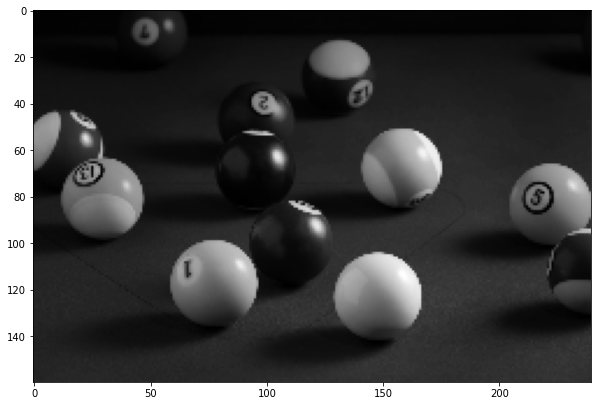

In [56]:
img = cv2.imread('data/balls2.jpg')
img = cv2.resize(img, (240, 160))
img_2d = img.reshape(-1, 3)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img_1d = gray_img.reshape(-1, 1)
gray_img_1d = np.float32(gray_img_1d) / 255.

display_img(gray_img, 'gray')

In [63]:
model = AcFCM(img_2d, 12)
U, V = model.run()

V_XB: 0.3822434903200247, clusters: 12
V_XB: 0.25229922035767016, clusters: 11
V_XB: 0.1717749827752503, clusters: 10
V_XB: 0.1298489285882613, clusters: 9
V_XB: 0.11190009451139526, clusters: 8
V_XB: 0.12556903016708307, clusters: 7


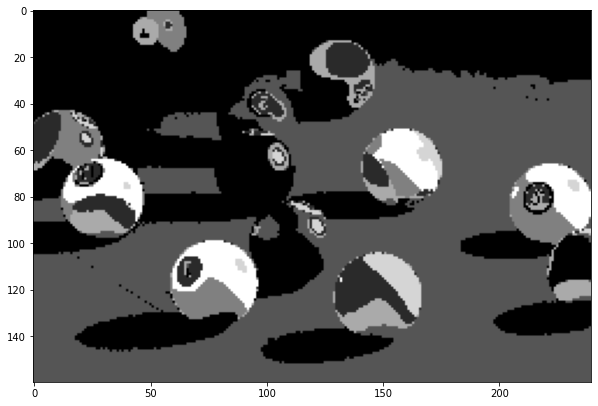

In [64]:
labels = np.argmax(U, axis=1).reshape(gray_img.shape)
display_img(labels, 'gray')